## Medicinal plant identification using CNN

In [6]:
#to check which package has been installed
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               


## Step 1: Importing the required library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator




## Step 2:Data Preprocessing

In [3]:
# Define paths
main_folder = r'C:\Users\vamsh\OneDrive\Desktop\Medicinal_plant'
dataset_folder = os.path.join(main_folder, 'Medicinal Leaf dataset')

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Example of additional augmentation
    width_shift_range=0.2,  # Example of additional augmentation
    height_shift_range=0.2,  # Example of additional augmentation
    validation_split=0.2  # Use 20% of the data for validation
)

# Load and preprocess leaf images
train_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=(128, 128),  # Adjust target size as needed
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=(128, 128),  # Adjust target size as needed
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Display some sample images
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

Found 5532 images belonging to 80 classes.
Found 1337 images belonging to 80 classes.


OSError: [Errno 22] Invalid argument

## Step 3 : Model Building and training

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), 
    Dense(80, activation='softmax')  # Adjust output units based on the number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=40,
                    validation_data=validation_generator)


C:\Users\vamsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


OSError: [Errno 22] Invalid argument

In [9]:
# Evaluate model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy:.2f}')
print(f'Validation Loss: {validation_loss:.2f}')


42/42 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.1930 - loss: 3.9658
Validation Accuracy: 0.20
Validation Loss: 3.97


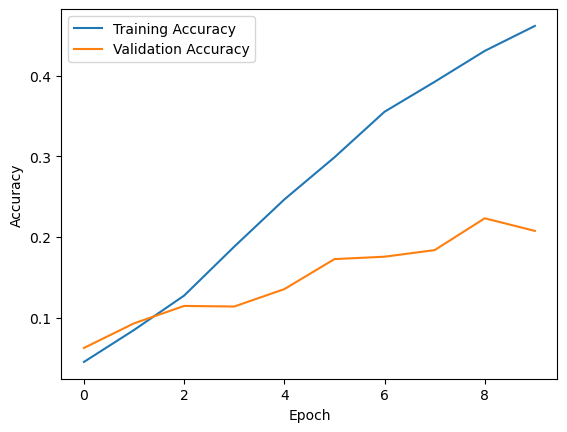

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
